In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
import tensorflow.keras.datasets.cifar10
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16366170686004744380
xla_global_id: -1
]


Load the data and asign it to the train and test variables.

In [5]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()

## data preparation 

Change the target data to categorical.

In [6]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

##  baseline model

creates a CNN named baseline.

In this baseline model I use multiple Conv2D layers, the first one takes the input shape of the images 32x32 and 3 colors,
the rest just take the input from the layer above.

For all of them i use the "relu" activation function as using most other activation functions gave worse results.

I use padding="same" for all of them to keep the output the same shape as the input.

Inbetween the Conv2D layers i use a MaxPooling2D layer to reduce the overall parameters and highlight the more important features that the Conv2D layer found.

In [7]:
baseline = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
baseline.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [10]:
baseline_history = baseline.fit(X_train, y_train, epochs=20, validation_data = (X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4961 - accuracy: 0.4637 - val_loss: 1.1356 - val_accuracy: 0.5998
Epoch 2/20
1563/1563 [==============================] - 206s 132ms/step - loss: 1.0328 - accuracy: 0.6371 - val_loss: 1.0264 - val_accuracy: 0.6415
Epoch 3/20
1563/1563 [==============================] - 219s 140ms/step - loss: 0.8714 - accuracy: 0.6955 - val_loss: 0.9240 - val_accuracy: 0.6872
Epoch 4/20
1563/1563 [==============================] - 254s 162ms/step - loss: 0.7790 - accuracy: 0.7292 - val_loss: 0.8327 - val_accuracy: 0.7166
Epoch 5/20
1563/1563 [==============================] - 241s 154ms/step - loss: 0.7004 - accuracy: 0.7566 - val_loss: 0.8482 - val_accuracy: 0.7141
Epoch 6/20
1563/1563 [==============================] - 209s 134ms/step - loss: 0.6454 - accuracy: 0.7761 - val_loss: 0.8886 - val_accuracy: 0.7164
Epoch 7/20
1563/1563 [==============================] - 225s 144ms/step - loss: 0.5942 - accuracy: 0.7911 - val_l

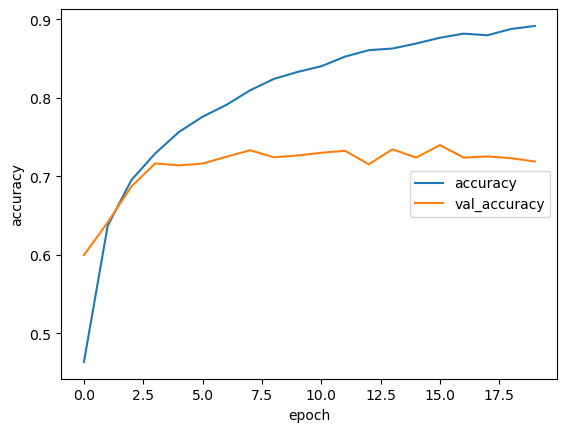

In [11]:
plt.plot(baseline_history.history["accuracy"], label="accuracy")
plt.plot(baseline_history.history["val_accuracy"], label="val_accuracy")
plt.legend(["accuracy", "val_accuracy"], loc="right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

## first model

To improve the performance of the CNN i've used the following techniques:
1. Adding a kernal_initalizer to keep the scale of the wieghts roughly the same throughout the network.
2. To help prevent overfitting, using a kernal_regularizer to give an extra "penalty" to the loss function.
3. And finally, to help against more overfitting, use a dropout layer inbetween the Conv2D and the MaxPooling2D layers.

In [30]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [31]:
cnn1 = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001), input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [32]:
cnn1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [34]:
cnn1_history = cnn1.fit(X_train, y_train, epochs=20, validation_data = (X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 246s 157ms/step - loss: 4.7039 - accuracy: 0.1971 - val_loss: 2.5484 - val_accuracy: 0.3367
Epoch 2/20
1563/1563 [==============================] - 262s 168ms/step - loss: 2.4929 - accuracy: 0.3452 - val_loss: 2.2439 - val_accuracy: 0.4304
Epoch 3/20
1563/1563 [==============================] - 271s 174ms/step - loss: 2.1717 - accuracy: 0.4306 - val_loss: 1.9025 - val_accuracy: 0.5033
Epoch 4/20
1563/1563 [==============================] - 239s 153ms/step - loss: 1.8747 - accuracy: 0.5074 - val_loss: 1.6039 - val_accuracy: 0.5901
Epoch 5/20
1563/1563 [==============================] - 140s 90ms/step - loss: 1.6273 - accuracy: 0.5708 - val_loss: 1.4717 - val_accuracy: 0.6129
Epoch 6/20
1563/1563 [==============================] - 135s 86ms/step - loss: 1.4362 - accuracy: 0.6154 - val_loss: 1.2527 - val_accuracy: 0.6760
Epoch 7/20
1563/1563 [==============================] - 133s 85ms/step - loss: 1.3262 - accuracy: 0.6402 - val_los

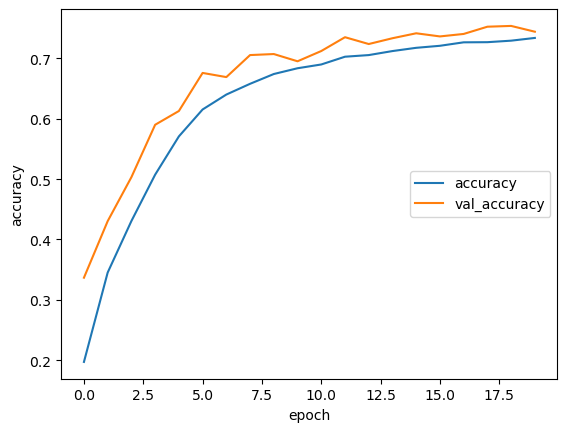

In [35]:
plt.plot(cnn1_history.history["accuracy"], label="accuracy")
plt.plot(cnn1_history.history["val_accuracy"], label="val_accuracy")
plt.legend(["accuracy", "val_accuracy"], loc="right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

## data augmentation

In [53]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Normalize the X data from: between 0 and 255, to between 0 and 1.

In [54]:
X_train = X_train/255
X_test = X_test/255

Generate more trainings data.

In [55]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
new_train = data_generator.flow(X_train, y_train, batch_size=64)

## second model

To further improve on the base model I used the following techniques:
1. Using the ImageDataGenerator I alterd/created more trainings data.
2. To normalized the data the X_train and X_test variables were divided by 255, creating floats between 0 and 1.
3. Using a different optimizer to hopefully prevent local minima and speed up convergence.

In [56]:
cnn2 = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001), input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [57]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
cnn2.compile(optimizer=opt, 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [58]:
cnn2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [59]:
steps = int(X_train.shape[0]/64)
cnn2_history = cnn2.fit(new_train, steps_per_epoch=steps, epochs=40, validation_data = (X_test, y_test), verbose=1)

Epoch 1/40
781/781 [==============================] - 60s 76ms/step - loss: 2.9986 - accuracy: 0.2130 - val_loss: 2.6524 - val_accuracy: 0.3697
Epoch 2/40
781/781 [==============================] - 60s 77ms/step - loss: 2.6165 - accuracy: 0.3481 - val_loss: 2.3805 - val_accuracy: 0.4430
Epoch 3/40
781/781 [==============================] - 60s 77ms/step - loss: 2.4378 - accuracy: 0.4072 - val_loss: 2.2558 - val_accuracy: 0.4768
Epoch 4/40
781/781 [==============================] - 64s 82ms/step - loss: 2.3376 - accuracy: 0.4384 - val_loss: 2.1524 - val_accuracy: 0.5089
Epoch 5/40
781/781 [==============================] - 62s 79ms/step - loss: 2.2444 - accuracy: 0.4699 - val_loss: 2.0991 - val_accuracy: 0.5148
Epoch 6/40
781/781 [==============================] - 62s 80ms/step - loss: 2.1722 - accuracy: 0.4883 - val_loss: 2.0146 - val_accuracy: 0.5445
Epoch 7/40
781/781 [==============================] - 64s 82ms/step - loss: 2.1070 - accuracy: 0.5071 - val_loss: 1.9345 - val_accuracy:

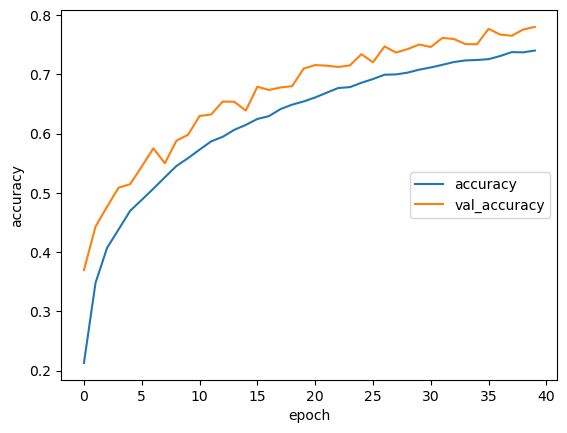

In [60]:
plt.plot(cnn2_history.history["accuracy"], label="accuracy")
plt.plot(cnn2_history.history["val_accuracy"], label="val_accuracy")
plt.legend(["accuracy", "val_accuracy"], loc="right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

## third model

In [61]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [62]:
X_train = X_train/255
X_test = X_test/255

In [63]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
new_train = data_generator.flow(X_train, y_train, batch_size=64)

To try and optimize the model even more I tried added a few more techniques:
1. To further normalize the data and hopfully speed up convergence, I use BatchNormalization inbetween the layers.
2. To further prevent overfitting, i increased the dropout rate as the depth of the network increases.

In [64]:
cnn3 = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001), input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [65]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
cnn3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
cnn3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [67]:
steps = int(X_train.shape[0]/64)
cnn3_history = cnn3.fit(new_train, steps_per_epoch=steps, epochs=40, validation_data = (X_test, y_test), verbose=1)

Epoch 1/40
781/781 [==============================] - 83s 105ms/step - loss: 3.0648 - accuracy: 0.2935 - val_loss: 2.3606 - val_accuracy: 0.4537
Epoch 2/40
781/781 [==============================] - 77s 99ms/step - loss: 2.5021 - accuracy: 0.3991 - val_loss: 2.2834 - val_accuracy: 0.4721
Epoch 3/40
781/781 [==============================] - 79s 101ms/step - loss: 2.3529 - accuracy: 0.4420 - val_loss: 2.2116 - val_accuracy: 0.4860
Epoch 4/40
781/781 [==============================] - 81s 104ms/step - loss: 2.2485 - accuracy: 0.4759 - val_loss: 2.1724 - val_accuracy: 0.4968
Epoch 5/40
781/781 [==============================] - 83s 106ms/step - loss: 2.1613 - accuracy: 0.5008 - val_loss: 2.3178 - val_accuracy: 0.4520
Epoch 6/40
781/781 [==============================] - 79s 102ms/step - loss: 2.0751 - accuracy: 0.5257 - val_loss: 2.0588 - val_accuracy: 0.5290
Epoch 7/40
781/781 [==============================] - 76s 97ms/step - loss: 2.0078 - accuracy: 0.5445 - val_loss: 2.0404 - val_accu

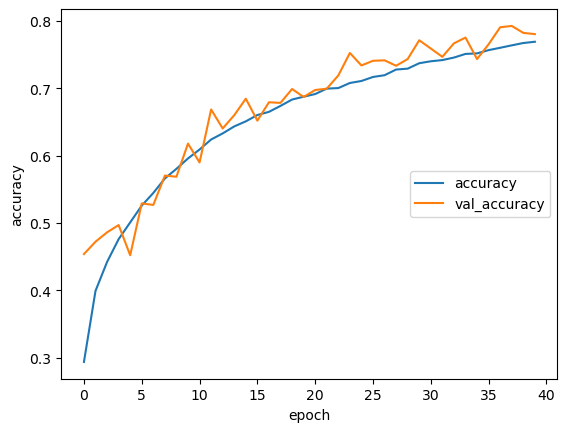

In [68]:
plt.plot(cnn3_history.history["accuracy"], label="accuracy")
plt.plot(cnn3_history.history["val_accuracy"], label="val_accuracy")
plt.legend(["cnn3_train", "cnn3_test"], loc="right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

## conclusion

In conclusion, although the cnn2 and cnn3 models take a lot more epochs to train, over time they do perform quite a bit better than the basemodel and cnn1.
Looking at the graph below, you can see that the models are not done training yet, I cut this short because the 40 epoch runs took over an hour to complete.

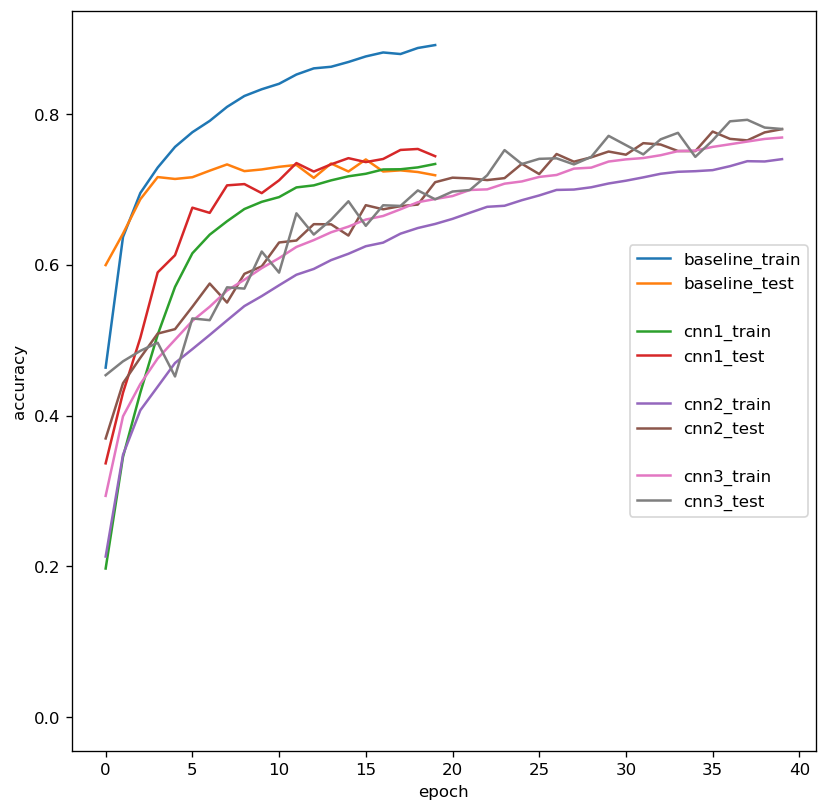

In [85]:
fig, ax = plt.subplots(figsize=(8,8), dpi=120)
ax.plot(baseline_history.history["accuracy"], label="baseline_train")
ax.plot(baseline_history.history["val_accuracy"], label="baseline_test")
ax.plot([0],[0],label=" ", color="#FFFFFF")
ax.plot(cnn1_history.history["accuracy"], label="cnn1_train")
ax.plot(cnn1_history.history["val_accuracy"], label="cnn1_test")
ax.plot([0],[0],label=" ", color="#FFFFFF")
ax.plot(cnn2_history.history["accuracy"], label="cnn2_train")
ax.plot(cnn2_history.history["val_accuracy"], label="cnn2_test")
ax.plot([0],[0],label=" ", color="#FFFFFF")
ax.plot(cnn3_history.history["accuracy"], label="cnn3_train")
ax.plot(cnn3_history.history["val_accuracy"], label="cnn3_test")
plt.xlabel("epoch")
plt.ylabel("accuracy")
ax.legend(loc="right")
plt.show()

In [24]:
_, acc = cnn1.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 4s 14ms/step - loss: 0.9390 - accuracy: 0.6613


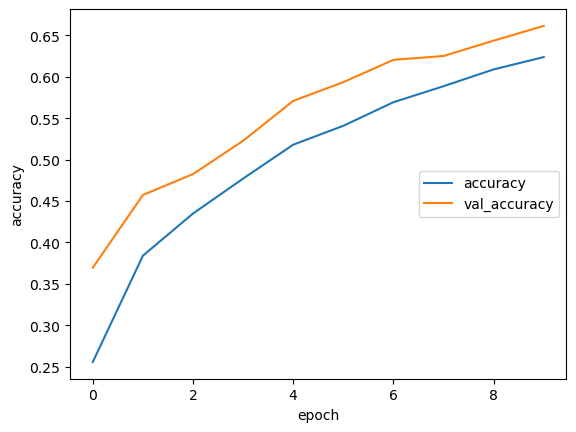

In [25]:
plt.plot(history1.history["accuracy"], label="accuracy")
plt.plot(history1.history["val_accuracy"], label="val_accuracy")
plt.legend(["accuracy", "val_accuracy"], loc="right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()